In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read dataset
df = pd.read_csv("F:\\symb. ML\\data files\\Bodyfat.csv")
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
# independent and dependent variables
x = df.drop(columns='bodyfat')
y = df['bodyfat']

<Figure size 2160x576 with 0 Axes>

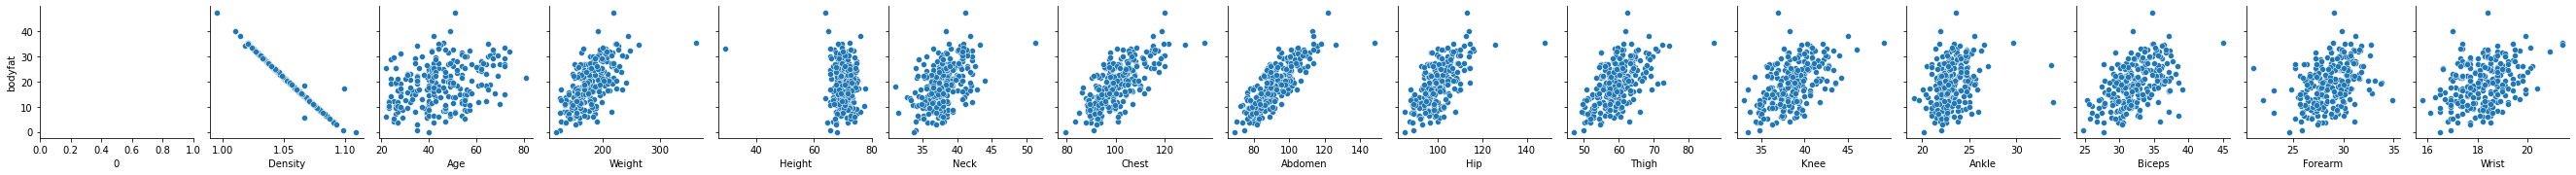

In [4]:
# check variable behaviour with target column
plt.figure(figsize=(30,8))
sns.pairplot(x_vars=['0','Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],y_vars=["bodyfat"],data=df)

In [5]:
# split data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

### Degree = 4

In [8]:
# fit model with degree = 4
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
xtr_poly = poly_reg.fit_transform(xtrain)
xte_poly = poly_reg.fit_transform(xtest)
polin_reg = LinearRegression()
polin_reg.fit(xtr_poly, ytrain)
ypred = polin_reg.predict(xte_poly)

In [9]:
# Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R2 score :",score)

MSE: 66.5217494501373
RMSE: 8.156086650479953
MAE: 4.816698727773521
R2 score : 0.08021277147351868


### Degree = 3

In [10]:
# fit model with degree = 3
poly_reg = PolynomialFeatures(degree=3)
xtr_poly = poly_reg.fit_transform(xtrain)
xte_poly = poly_reg.fit_transform(xtest)
polin_reg = LinearRegression()
polin_reg.fit(xtr_poly, ytrain)
ypred = polin_reg.predict(xte_poly)

In [11]:
# Evaluation
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R2 score :",score)

MSE: 46.74460533252992
RMSE: 6.837002657051547
MAE: 4.349643093114864
R2 score : 0.3536686671236796


### Degree = 2

In [12]:
# fit model with degree = 2
poly_reg = PolynomialFeatures(degree=2)
xtr_poly = poly_reg.fit_transform(xtrain)
xte_poly = poly_reg.fit_transform(xtest)
polin_reg = LinearRegression()
polin_reg.fit(xtr_poly, ytrain)

LinearRegression()

In [13]:
# predict with test data
ypred = polin_reg.predict(xte_poly)

In [14]:
# Evaluation
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R2 score :",score)

MSE: 2.864153247946665
RMSE: 1.6923809405528842
MAE: 1.0309248475467458
R2 score : 0.9603977405919149


### Conclusion : After trying various degrees, value of degree 2 is giving good results instead of values 3 and 4. So, degree 2 would be best model for this dataset.